In [33]:
from sklearn.datasets import make_classification
import numpy as np
#X, Y = make_classification(n_samples=2000, n_classes=2, n_features=10, random_state=0)

In [35]:
data = pd.read_csv("dataset/train.csv")
X=data.drop('price_range',axis=1)

In [37]:
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,841,0,1.1,0,0,0,7,0.6,88,1,1,10,756,1549,9,7,9,0,0,0
1,10,0,0.5,0,0,0,51,0.7,16,1,6,905,988,1610,7,1,7,0,0,0
2,561,0,0.5,0,1,0,40,0.9,45,5,6,161,706,1601,0,1,9,0,0,0
3,605,0,1.5,0,0,0,0,0.8,10,6,9,106,786,1769,6,8,0,0,0,0
4,810,0,0.1,0,1,0,44,0.6,40,1,4,108,101,400,8,1,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0,0.5,0,0,0,1,0.8,6,6,4,111,890,668,1,4,9,0,0,0
1996,965,0,1.6,0,0,0,19,0.1,87,4,1,905,965,1011,0,0,6,0,0,0
1997,900,0,0.9,0,0,0,16,0.7,8,8,1,868,611,1057,9,0,5,0,0,0
1998,501,0,0.9,0,4,0,46,0.0,45,5,5,116,670,869,8,0,9,0,0,0


In [38]:
Y=data['price_range']

In [39]:
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

In [40]:
X

array([[ 8.41000000e+02,  0.00000000e+00,  1.10000000e+00, ...,
        -3.05724444e-02,  1.57708821e+00, -8.12802101e-01],
       [ 1.00000000e+01,  0.00000000e+00,  5.00000000e-01, ...,
        -2.02734580e-01, -2.57866475e-01,  7.08145207e-02],
       [ 5.61000000e+02,  0.00000000e+00,  5.00000000e-01, ...,
        -1.99742980e+00, -3.19209144e-02,  2.23965758e-01],
       ...,
       [ 9.00000000e+02,  0.00000000e+00,  9.00000000e-01, ...,
        -9.01742787e-02,  7.80109292e-01, -1.06000282e+00],
       [ 5.01000000e+02,  0.00000000e+00,  9.00000000e-01, ...,
         3.18699232e-01,  1.99602841e+00,  9.59138850e-01],
       [ 5.00000000e+02,  0.00000000e+00,  1.00000000e+00, ...,
         3.53671104e-01, -1.68521325e-01, -1.07982160e-01]])

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2,
                                                    random_state=0)

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [53]:
#rf = RandomForestClassifier(max_features=5, n_estimators=500)
#rf.fit(X_train, Y_train)

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=9)

In [56]:
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [66]:
r_probs = [0 for _ in range(len(Y_test))]
knn_probs = knn.predict_proba(X_test)
nb_probs = nb.predict_proba(X_test)

In [67]:
knn_probs = knn_probs[:, 1]
nb_probs = nb_probs[:, 1]

In [68]:
from sklearn.metrics import roc_curve, roc_auc_score

In [69]:
r_auc = roc_auc_score(Y_test, r_probs)
knn_auc = roc_auc_score(Y_test, knn_probs)
nb_auc = roc_auc_score(Y_test, nb_probs)

In [70]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (knn_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.940
Naive Bayes: AUROC = 0.798


In [71]:
r_fpr, r_tpr, _ = roc_curve(Y_test, r_probs)
knn_fpr, knn_tpr, _ = roc_curve(Y_test, knn_probs)
nb_fpr, nb_tpr, _ = roc_curve(Y_test, nb_probs)

In [72]:
import matplotlib.pyplot as plt

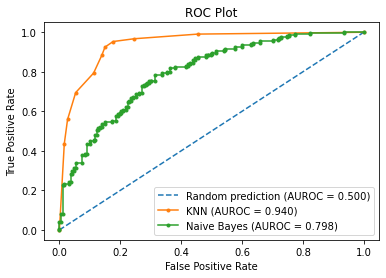

In [74]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN (AUROC = %0.3f)' % knn_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

In [16]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
data = pd.read_csv("dataset/train.csv")
data.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,841,0,1.1,0,0,0,7,0.6,88,1,...,10,756,1549,9,7,9,0,0,0,0
1,10,0,0.5,0,0,0,51,0.7,16,1,...,905,988,1610,7,1,7,0,0,0,1
2,561,0,0.5,0,1,0,40,0.9,45,5,...,161,706,1601,0,1,9,0,0,0,1
3,605,0,1.5,0,0,0,0,0.8,10,6,...,106,786,1769,6,8,0,0,0,0,1
4,810,0,0.1,0,1,0,44,0.6,40,1,...,108,101,400,8,1,5,0,0,0,0
5,859,0,0.5,0,1,0,11,0.7,64,0,...,4,654,67,7,0,0,0,0,0,0
6,810,0,0.7,0,4,0,0,0.8,19,8,...,180,8,1110,1,8,8,0,0,0,1
7,954,0,0.5,0,0,0,14,0.8,87,4,...,501,49,700,6,1,5,0,0,0,0
8,445,0,0.5,0,0,0,51,0.7,74,7,...,186,816,99,7,0,10,0,0,0,0
9,509,0,0.6,0,1,0,9,0.0,91,5,...,17,114,501,9,0,1,0,0,0,0


In [27]:
X = data.iloc[:,0:-1].values
y = data.iloc[:,-1].values

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 4)

In [29]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [30]:
from sklearn.svm import SVC
model_SVC = SVC(kernel = 'rbf', random_state = 4)
model_SVC.fit(X_train, y_train)

y_pred_svm = model_SVC.decision_function(X_test)

In [31]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

y_pred_logistic = model_logistic.decision_function(X_test)

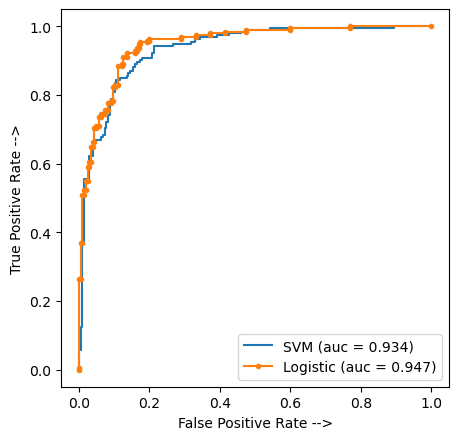

In [32]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()